In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
METRICS_ORDER = ["kl", "hd", "jsd", "acc", "ace", "spa", "mse"]

METRIC_NAMES = {
    "kl": "KL",
    "hd": "HD",
    "jsd": "JSD",
    "acc": "Acc.",
    "ace": "ACE",
    "spa": "SPA",
    "mse": "MSE",
}

In [3]:
import pandas as pd
import numpy as np

summary = pd.read_csv("../analysis/results/summary_mean_std.csv", header=[0, 1])

# MultiIndex を flatten
summary.columns = [
    c[0] if c[1] == '' or c[1].startswith('Unnamed') else f"{c[0]}_{c[1]}"
    for c in summary.columns
]


In [4]:
LOWER_IS_BETTER = {"kl", "hd", "jsd", "ace", "mse"}

def format_mean_std(df, metric):
    mean = df[f"{metric}_mean"]
    std = df[f"{metric}_std"]

    if metric in LOWER_IS_BETTER:
        order = mean.argsort()
    else:
        order = (-mean).argsort()

    best, second = order.iloc[0], order.iloc[1]

    out = []
    for i in range(len(df)):
        s = f"{mean.iloc[i]:.2f} ± {std.iloc[i]:.2f}"
        if i == best:
            s = f"\\textbf{{{s}}}"
        elif i == second:
            s = f"\\underline{{{s}}}"
        out.append(s)
    return out


In [5]:
table1 = pd.DataFrame()
table1["Method"] = summary["method"]

for m in METRICS_ORDER:
    table1[METRIC_NAMES[m]] = format_mean_std(summary, m)

table1


,Method,KL,HD,JSD,Acc.,ACE,SPA,MSE
0,full_information,\textbf{2.38 ± 1.47},\textbf{2.04 ± 1.02},\textbf{0.73 ± 0.44},\textbf{0.89 ± 0.07},\textbf{0.25 ± 0.15},\textbf{0.87 ± 0.06},\textbf{0.04 ± 0.03}
1,popularity,4.71 ± 3.17,2.72 ± 1.42,1.32 ± 0.81,0.79 ± 0.12,0.33 ± 0.21,0.82 ± 0.09,0.06 ± 0.04
2,proposed,\underline{2.48 ± 1.54},\underline{2.06 ± 1.04},\underline{0.75 ± 0.45},\underline{0.88 ± 0.08},\underline{0.26 ± 0.16},\underline{0.87 ± 0.07},\underline{0.05 ± 0.03}
3,random,4.71 ± 3.17,2.72 ± 1.42,1.32 ± 0.81,0.79 ± 0.12,0.33 ± 0.21,0.82 ± 0.09,0.06 ± 0.04
4,simple_markov,4.71 ± 3.17,2.72 ± 1.42,1.32 ± 0.81,0.79 ± 0.12,0.33 ± 0.21,0.82 ± 0.09,0.06 ± 0.04


In [6]:
print(table1.to_latex(escape=False, index=False))

\begin{tabular}{llllllll}
\toprule
Method & KL & HD & JSD & Acc. & ACE & SPA & MSE \\
\midrule
full_information & \textbf{2.38 ± 1.47} & \textbf{2.04 ± 1.02} & \textbf{0.73 ± 0.44} & \textbf{0.89 ± 0.07} & \textbf{0.25 ± 0.15} & \textbf{0.87 ± 0.06} & \textbf{0.04 ± 0.03} \\
popularity & 4.71 ± 3.17 & 2.72 ± 1.42 & 1.32 ± 0.81 & 0.79 ± 0.12 & 0.33 ± 0.21 & 0.82 ± 0.09 & 0.06 ± 0.04 \\
proposed & \underline{2.48 ± 1.54} & \underline{2.06 ± 1.04} & \underline{0.75 ± 0.45} & \underline{0.88 ± 0.08} & \underline{0.26 ± 0.16} & \underline{0.87 ± 0.07} & \underline{0.05 ± 0.03} \\
random & 4.71 ± 3.17 & 2.72 ± 1.42 & 1.32 ± 0.81 & 0.79 ± 0.12 & 0.33 ± 0.21 & 0.82 ± 0.09 & 0.06 ± 0.04 \\
simple_markov & 4.71 ± 3.17 & 2.72 ± 1.42 & 1.32 ± 0.81 & 0.79 ± 0.12 & 0.33 ± 0.21 & 0.82 ± 0.09 & 0.06 ± 0.04 \\
\bottomrule
\end{tabular}



In [7]:
ratio = pd.read_csv("../analysis/results/significant_ratio.csv")

ratio["percent"] = 100 * ratio["significant_ratio"]

In [ ]:
BASELINE_ORDER = [
    "full_information",
    "popularity",
    "random",
    "simple_markov",
]

table2 = pd.DataFrame()
table2["vs. Method"] = [f"vs. {b}" for b in BASELINE_ORDER]

for m in METRICS_ORDER:
    vals = []
    for b in BASELINE_ORDER:
        v = ratio[
            (ratio["metric"] == m) &
            (ratio["baseline"] == b)
        ]["percent"].values

        vals.append(f"{v[0]:.1f}" if len(v) > 0 else "-")

    table2[METRIC_NAMES[m]] = vals

table2

,vs. Method,KL,HD,JSD,Acc.,ACE,SPA,MSE
0,vs. PopulationBase,-,-,-,-,-,-,-
1,vs. NextNodeBase,-,-,-,-,-,-,-
2,vs. Random,-,-,-,-,-,-,-
3,vs. Upper,-,-,-,-,-,-,-


In [9]:
print(table2.to_latex(index=False))

\begin{tabular}{llllllll}
\toprule
vs. Method & KL & HD & JSD & Acc. & ACE & SPA & MSE \\
\midrule
vs. PopulationBase & - & - & - & - & - & - & - \\
vs. NextNodeBase & - & - & - & - & - & - & - \\
vs. Random & - & - & - & - & - & - & - \\
vs. Upper & - & - & - & - & - & - & - \\
\bottomrule
\end{tabular}



In [10]:
def plot_mean_std(summary, metric):
    # methodカラムは単一レベル、他はマルチレベルなので注意が必要
    method_col = summary[("method", "Unnamed: 0_level_1")]  # または summary.iloc[:, 0]
    mean_col = summary[(metric, "mean")]
    std_col = summary[(metric, "std")]
    
    df = pd.DataFrame({
        "method": method_col,
        "mean": mean_col,
        "std": std_col
    })

    plt.figure(figsize=(6, 4))
    plt.bar(df["method"], df["mean"], yerr=df["std"], capsize=4)
    plt.title(f"{metric.upper()} (Mean ± Std)")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
plot_mean_std(summary, "acc")

KeyError: ('method', 'Unnamed: 0_level_1')

In [ ]:
def plot_significant_ratio(ratio, metric):
    df = ratio[ratio["metric"] == metric]
    pivot = df.pivot(
        index="baseline",
        columns="metric",
        values="significant_ratio"
    )

    plt.figure(figsize=(4, 4))
    sns.heatmap(
        pivot,
        annot=True,
        cmap="Reds",
        vmin=0,
        vmax=1,
        cbar=True
    )
    plt.title(f"Significant Ratio ({metric})")
    plt.tight_layout()
    plt.show()

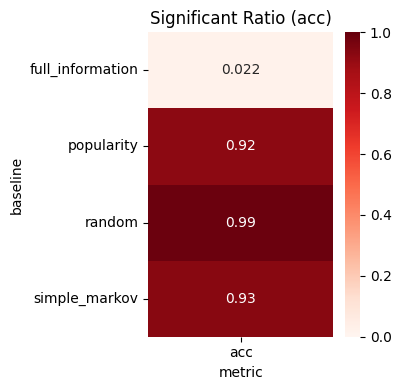

In [ ]:
plot_significant_ratio(ratio, "acc")

In [ ]:
import glob
import os

# すべての結果CSVファイルを読み込んで結合
result_files = glob.glob("../outputs/synthetic/results/*.csv")
df_list = []
for file in result_files:
    df = pd.read_csv(file)
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)

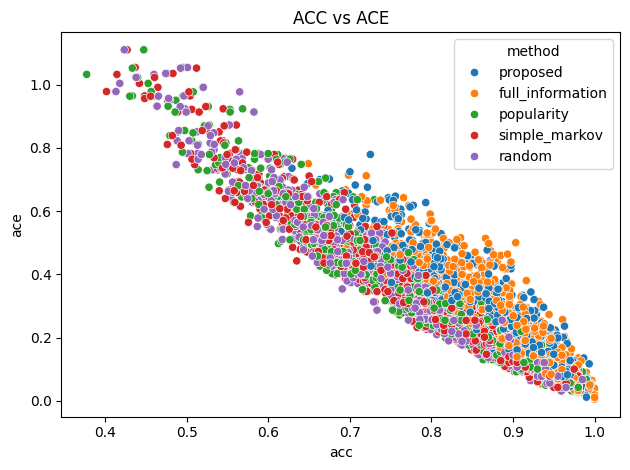

In [ ]:
sns.scatterplot(
    data=df_all,
    x="acc",
    y="ace",
    hue="method"
)
plt.title("ACC vs ACE")
plt.tight_layout()
plt.show()